In [92]:
#подключение библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from tqdm.notebook import tqdm

tqdm.pandas()

In [93]:
path = './data'
raw_data = pd.read_csv('data.csv')
raw_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [94]:
set(raw_data['wine'])

{'Red', 'white'}

In [95]:
def target(wine):
    if wine == 'Red':
        return 0
    elif wine == 'white':
        return 1

raw_data['wine'] = raw_data['wine'].apply(target)
raw_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [96]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [97]:
raw_data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [98]:
# Исходные данные
raw_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [99]:
# Первым делом представим строковые данные как числовые
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(raw_data)
number_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<AxesSubplot:>

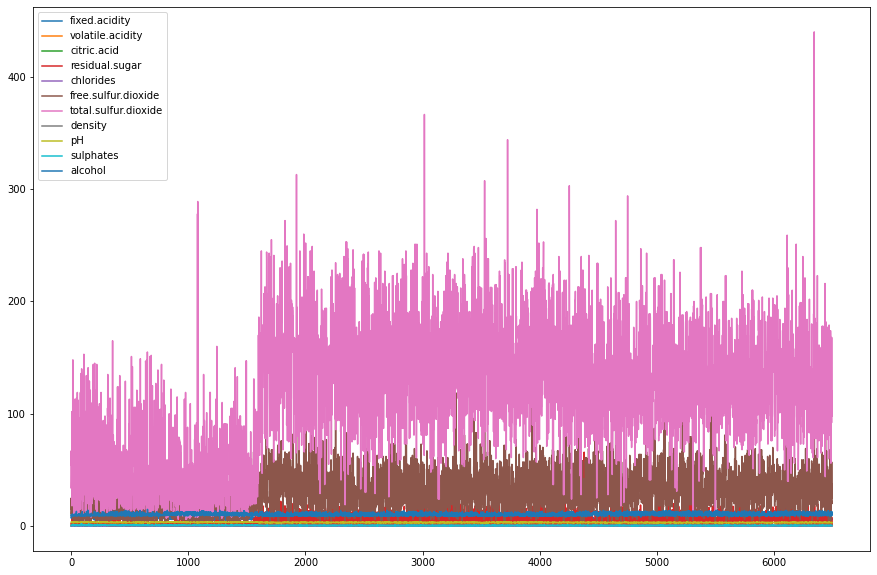

In [100]:
number_data[number_data.columns[:-2]].plot(figsize=(15, 10))

In [101]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
mm_norm_number_data = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
mm_norm_number_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


<AxesSubplot:>

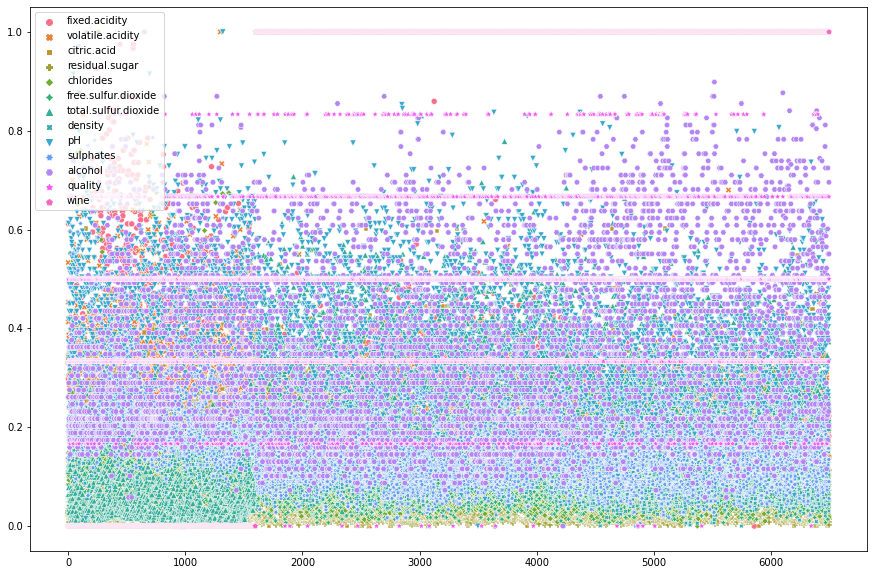

In [102]:
# Данный нормализатор выравнивает данные относительно минимального и максимального
# mm_norm_number_data.plot(figsize=(10, 10), )
plt.figure(figsize=(15, 10))
sns.scatterplot(data=mm_norm_number_data)

<AxesSubplot:>

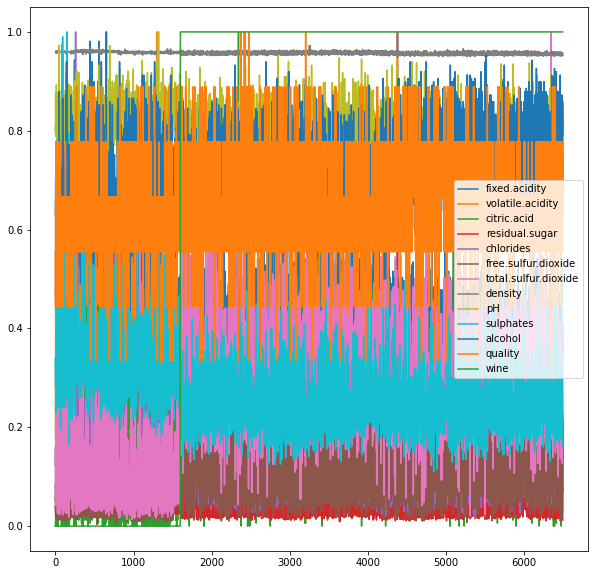

In [103]:
# Данный нормализатор выравнивает данные относительно максимально
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(number_data)
ma_norm_data = pd.DataFrame(columns=number_data.columns, data=ma_scaler.transform(number_data))
ma_norm_data.plot(figsize=(10, 10))

<AxesSubplot:>

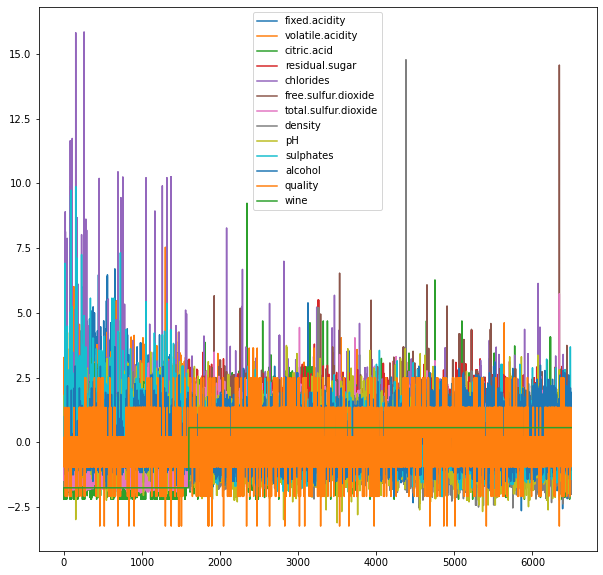

In [104]:
# Нормализация на основе дисперсии и мат. ожидания
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(number_data)
std_norm_data = pd.DataFrame(columns=number_data.columns, data=std_scaler.transform(number_data))
std_norm_data.plot(figsize=(10, 10))

<AxesSubplot:>

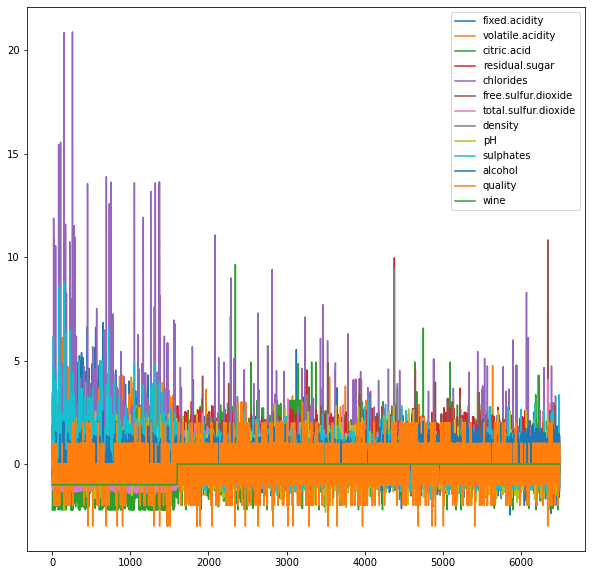

In [105]:
# Нормализация на основе дисперсии и мат. ожидания c удалением выбросов
std_clear_scaler = preprocessing.RobustScaler()
std_clear_scaler.fit(number_data)
std_clear_norm_data = pd.DataFrame(columns=number_data.columns, data=std_clear_scaler.transform(number_data))
std_clear_norm_data.plot(figsize=(10, 10))

In [106]:
from sklearn.model_selection import train_test_split

X = std_clear_norm_data.drop('wine', axis=1).values
Y = std_clear_norm_data['wine'].values

#X = ma_norm_data[:-1]
#Y = ma_norm_data[-1]


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

In [107]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSProp
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

In [108]:
std_clear_norm_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000,-1.0,-1.0
1,0.615385,3.470588,-2.214286,-0.063492,1.888889,-0.166667,-0.645570,0.410753,-0.047619,1.000000,-0.277778,-1.0,-1.0
2,0.615385,2.764706,-1.928571,-0.111111,1.666667,-0.583333,-0.810127,0.453763,0.238095,0.823529,-0.277778,-1.0,-1.0
3,3.230769,-0.058824,1.785714,-0.174603,1.037037,-0.500000,-0.734177,0.668817,-0.238095,0.411765,-0.277778,0.0,-1.0
4,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.615385,-0.470588,-0.142857,-0.222222,-0.296296,-0.208333,-0.329114,-0.806452,0.285714,-0.058824,0.500000,0.0,0.0
6493,-0.307692,0.176471,0.357143,0.793651,0.000000,1.166667,0.632911,0.002151,-0.285714,-0.294118,-0.388889,-1.0,0.0
6494,-0.384615,-0.294118,-0.857143,-0.285714,-0.222222,0.041667,-0.088608,-0.505376,-1.047619,-0.294118,-0.500000,0.0,0.0
6495,-1.153846,0.000000,-0.071429,-0.301587,-0.925926,-0.375000,-0.101266,-1.333333,0.619048,-0.764706,1.388889,1.0,0.0


In [109]:
model = Sequential()
model.add(Dense(10, activation=activations.relu, input_dim=X.shape[1])) # input_dim = 4
model.add(Dense(1, activation='sigmoid')) # output = 3

model.compile(Adam(), 'mae')

In [110]:
model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=3)

Epoch 1/100
1733/1733 [==============================] - 2s 858us/step - loss: 0.3109
Epoch 2/100
1733/1733 [==============================] - 1s 863us/step - loss: 0.2473
Epoch 3/100
1733/1733 [==============================] - 2s 874us/step - loss: 0.2465
Epoch 4/100
1733/1733 [==============================] - 2s 871us/step - loss: 0.2464
Epoch 5/100
1733/1733 [==============================] - 2s 892us/step - loss: 0.2463
Epoch 6/100
1733/1733 [==============================] - 2s 880us/step - loss: 0.2463
Epoch 7/100
1733/1733 [==============================] - 2s 884us/step - loss: 0.2463
Epoch 8/100
1733/1733 [==============================] - 2s 901us/step - loss: 0.2463
Epoch 9/100
1733/1733 [==============================] - 2s 877us/step - loss: 0.2463
Epoch 10/100
1733/1733 [==============================] - 2s 888us/step - loss: 0.2463
Epoch 11/100
1733/1733 [==============================] - 2s 897us/step - loss: 0.2463
Epoch 12/100
1733/1733 [============================

In [111]:
# для тестовых данных
model.evaluate(X_train, y_train)

163/163 [==============================] - 0s 883us/step - loss: 0.2463


0.24629594385623932

In [113]:
# для тренировочных
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.2454


0.24538461863994598

In [114]:
# Подключим новые библиотеки
# библиотека дополнительных возможностей (действий) при обучении сети
from keras import callbacks

In [115]:
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(10, activation=activations.relu, input_dim=input_len))
    model.add(Dense(output_len, activation=activations.sigmoid))
    model.compile(Adam(), 'mae')
    return model

In [116]:
model = make_nn(X_train.shape[1], 1)

print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=5,
    epochs=100,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети


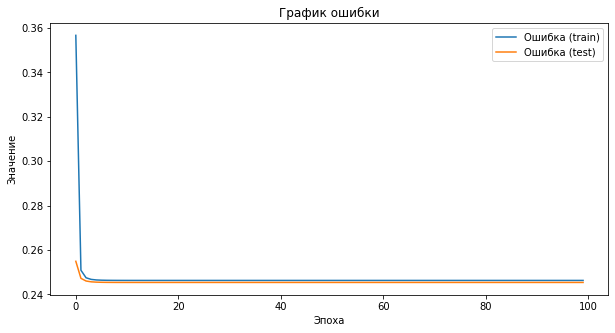

In [117]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [118]:
model = make_nn(X.shape[1], 1)

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=3,
    epochs=100,
    verbose=1,
#Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети
Epoch 1/100
1733/1733 [==============================] - 2s 987us/step - loss: 0.3974 - val_loss: 0.0057
Epoch 2/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3098 - val_loss: 7.9840e-04
Epoch 3/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3081 - val_loss: 2.0452e-04
Epoch 4/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3078 - val_loss: 6.3725e-05
Epoch 5/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 2.1664e-05
Epoch 6/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 7.6809e-06
Epoch 7/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 2.7948e-06TA
Epoch 8/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 1.0324e-06
Epoch 9/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 3.9111e-07
Epoch 10/100
1

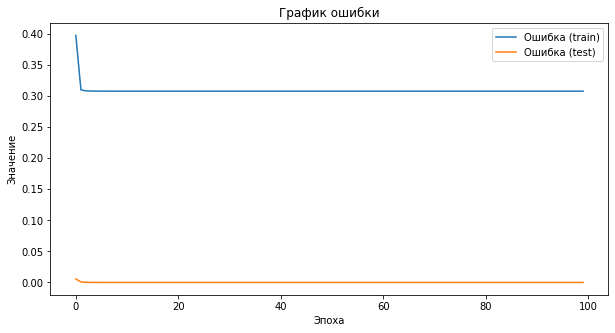

In [119]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [120]:
model = make_nn(X.shape[1], 1)

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=3,
#Так как у нас теперь есть рання остановка мы можем увеличеть количество эпох (было 100 стало 300)
    epochs=300,
    verbose=1,
#Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
#На основе какого значения будет приниматься решеня об остановке
            monitor='val_loss',
#Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
#Количество эпок в резельтате которых если значение не изменилось, то произвести остановку
            patience=50,
#"Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.01,
        )
    ]
    
)

Начинаем обучение сети
Epoch 1/300
1733/1733 [==============================] - 2s 1ms/step - loss: 0.4161 - val_loss: 0.0045
Epoch 2/300
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3101 - val_loss: 6.6661e-04
Epoch 3/300
1733/1733 [==============================] - 2s 996us/step - loss: 0.3082 - val_loss: 1.8391e-04
Epoch 4/300
1733/1733 [==============================] - 2s 984us/step - loss: 0.3078 - val_loss: 6.0256e-05
Epoch 5/300
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 2.1235e-05
Epoch 6/300
1733/1733 [==============================] - 2s 994us/step - loss: 0.3077 - val_loss: 7.7239e-06
Epoch 7/300
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 2.8837e-06
Epoch 8/300
1733/1733 [==============================] - 4s 2ms/step - loss: 0.3077 - val_loss: 1.0833e-06
Epoch 9/300
1733/1733 [==============================] - 2s 1ms/step - loss: 0.3077 - val_loss: 4.1049e-07
Epoch 10/300

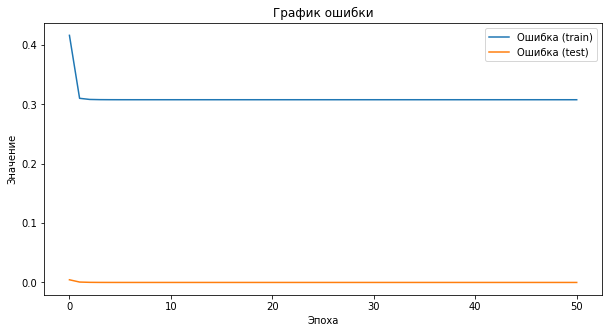

In [121]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [122]:
from pathlib import Path
from os import remove

In [123]:
# создадим функцию создания о очисти каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'modelloss.hdf5'
def make_save_points(name='save_points', file_name=file_name):
#выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    #Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    #Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

In [124]:
from keras import callbacks
from keras.layers import Dropout

In [126]:
print('Начинаем обучение сети')

def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(26, activation=activations.relu, input_dim=input_len))
    model.add(Dropout(0.5))
    model.add(Dense(13, activation=activations.relu))
    model.add(Dropout(0.25))
    model.add(Dense(output_len, activation=activations.sigmoid))
    model.compile(Adam(), 'mse', metrics=['mae'])
    return model

history = make_nn(X.shape[1], 1).fit(
    x=X,
    y=Y,
    batch_size=15,
    epochs=300,
    validation_split=0.2,
    verbose=0,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
#         callbacks.EarlyStopping(
#             monitor='val_loss',
#             mode='min',
#             patience=50,
#             min_delta=0.0001
#         ),
#Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#Указываем какое значение отслеживать
            monitor='val_loss',
#Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            save_freq='epoch',
#Указываем сторону лучших значений
            mode='min'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками c:\Users\User\Desktop\laba4\save_points
Удаляем файл save_points\modelloss.hdf5


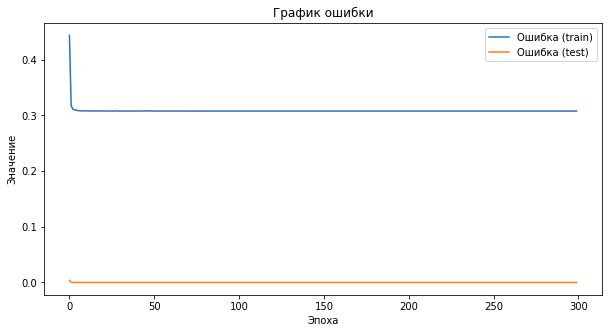

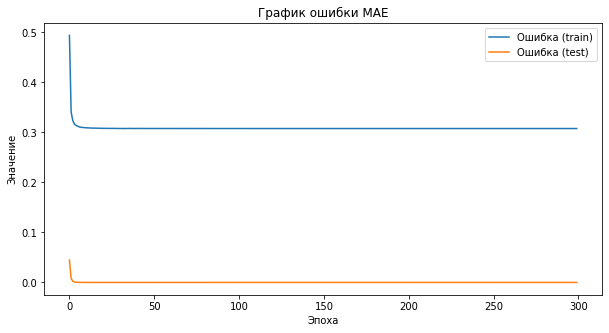

In [127]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('График ошибки MAE')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [128]:
from keras.models import load_model
# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model(r'C:\Users\User\Desktop\laba4\save_points\modelloss.hdf5')

print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, y_train)}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, y_test)}')

163/163 [==============================] - 0s 1ms/step - loss: 0.2463 - mae: 0.2463
Точность предсказания на тренировочных данных [0.24629594385623932, 0.24629594385623932]
41/41 [==============================] - 0s 941us/step - loss: 0.2454 - mae: 0.2454
Точность предсказания на тестовых данных [0.24538461863994598, 0.24538461863994598]


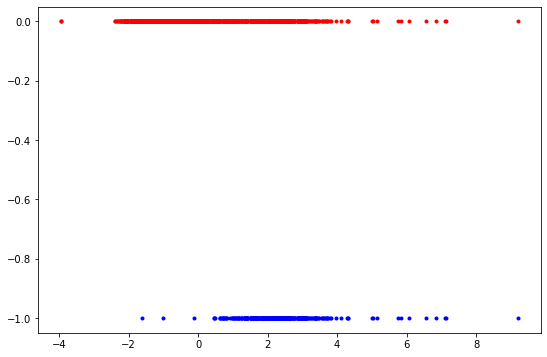

In [129]:
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

pca = PCA(n_components=1).fit(X_test)
fig, ax = plt.subplots(figsize=(9, 6))

pca_x = pca.transform(X_test)

ax.plot(pca_x, y_test, 'bo', markersize=3)
ax.plot(pca_x, loaded_model.predict(X_test), 'ro', markersize=3)

In [130]:
import scipy
from scipy.stats import t

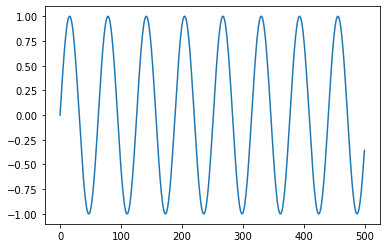

In [131]:
sin_x = pd.Series(np.sin(np.arange(0, 50, 0.1)))
plt.plot(sin_x)

In [132]:
X = []
for i in range(len(sin_x) - 3):
    buf = []
    for j in range(3):
        buf.append(sin_x[i + j])
    X.append(buf)
X = np.array(X)
X.shape

(497, 3)

In [133]:
X[:5]

array([[0.        , 0.09983342, 0.19866933],
       [0.09983342, 0.19866933, 0.29552021],
       [0.19866933, 0.29552021, 0.38941834],
       [0.29552021, 0.38941834, 0.47942554],
       [0.38941834, 0.47942554, 0.56464247]])

In [134]:
print('Начинаем обучение сети')

def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(10, activation=activations.tanh, use_bias=True, input_dim=input_len))
    model.add(Dense(output_len, activation=activations.tanh, use_bias=True))
    model.compile(Adam(), 'mae')
    return model

history = make_nn(2, 1).fit(
    x=X[:, :-1],
    y=X[:, -1],
    batch_size=16,
    epochs=300,
    validation_split=0.2,
    verbose=0,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
        callbacks.EarlyStopping(
            monitor='val_loss',
            mode='min',
            patience=50,
            min_delta=0.01
        ),
#Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#Указываем какое значение отслеживать
            monitor='val_loss',
#Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах) save_freq='epoch'
            save_freq='epoch',
#Указываем сторону лучших значений
            mode='min'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками c:\Users\User\Desktop\laba4\save_points
Удаляем файл save_points\modelloss.hdf5


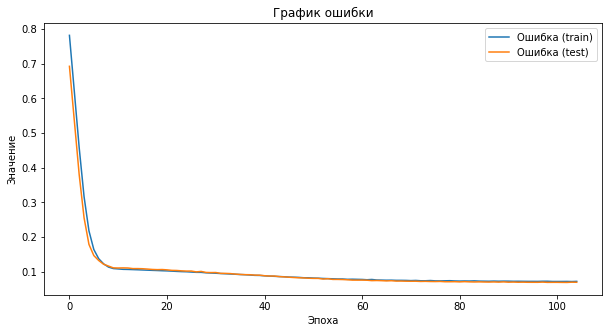

In [135]:
plt.figure(0, figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

In [136]:
from keras.models import load_model
# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model(r'C:\Users\User\Desktop\laba4\save_points\modelloss.hdf5')


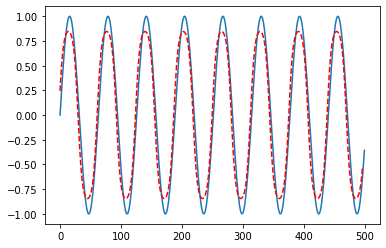

In [137]:
plt.plot(sin_x)
y = loaded_model.predict(X[:, :-1])
plt.plot(y, 'r--')